# Exercise 07: Heatmap

Подключаемся к базе данных

In [11]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

connection = sqlite3.connect("../data/checking-logs.sqlite")

Работаем с датафреём и выделяем необходимые данные

In [12]:
commits = pd.read_sql("""
    SELECT 
        uid,
        timestamp,
        strftime('%w', timestamp) AS weekday_num,
        strftime('%H', timestamp) AS hour         
    FROM checker
    WHERE uid LIKE 'user_%'
""", connection)



weekday_map = {
    '0': 'Sun',
    '1': 'Mon',
    '2': 'Tue',
    '3': 'Wed',
    '4': 'Thu',
    '5': 'Fri',
    '6': 'Sat'
}
commits['weekday'] = commits['weekday_num'].map(weekday_map)

commits = commits[['uid', 'weekday', 'hour']]

In [20]:

heatmap_weekday = commits.groupby(['uid', 'weekday']).size().unstack(fill_value=0)

heatmap_hour = commits.groupby(['uid', 'hour']).size().unstack(fill_value=0)

total_commits = heatmap_weekday.sum(axis=1).sort_values(ascending=False).index
heatmap_weekday = heatmap_weekday.loc[total_commits]
heatmap_hour = heatmap_hour.loc[total_commits]


weekdays_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
hours_order = [str(i).zfill(2) for i in range(24)]  

heatmap_weekday = heatmap_weekday.reindex(columns=weekdays_order)
heatmap_hour = heatmap_hour.reindex(columns=hours_order)

(len(heatmap_weekday), heatmap_weekday.shape[1]), (len(heatmap_hour), heatmap_hour.shape[1])

((30, 7), (30, 24))

Cоздаём график

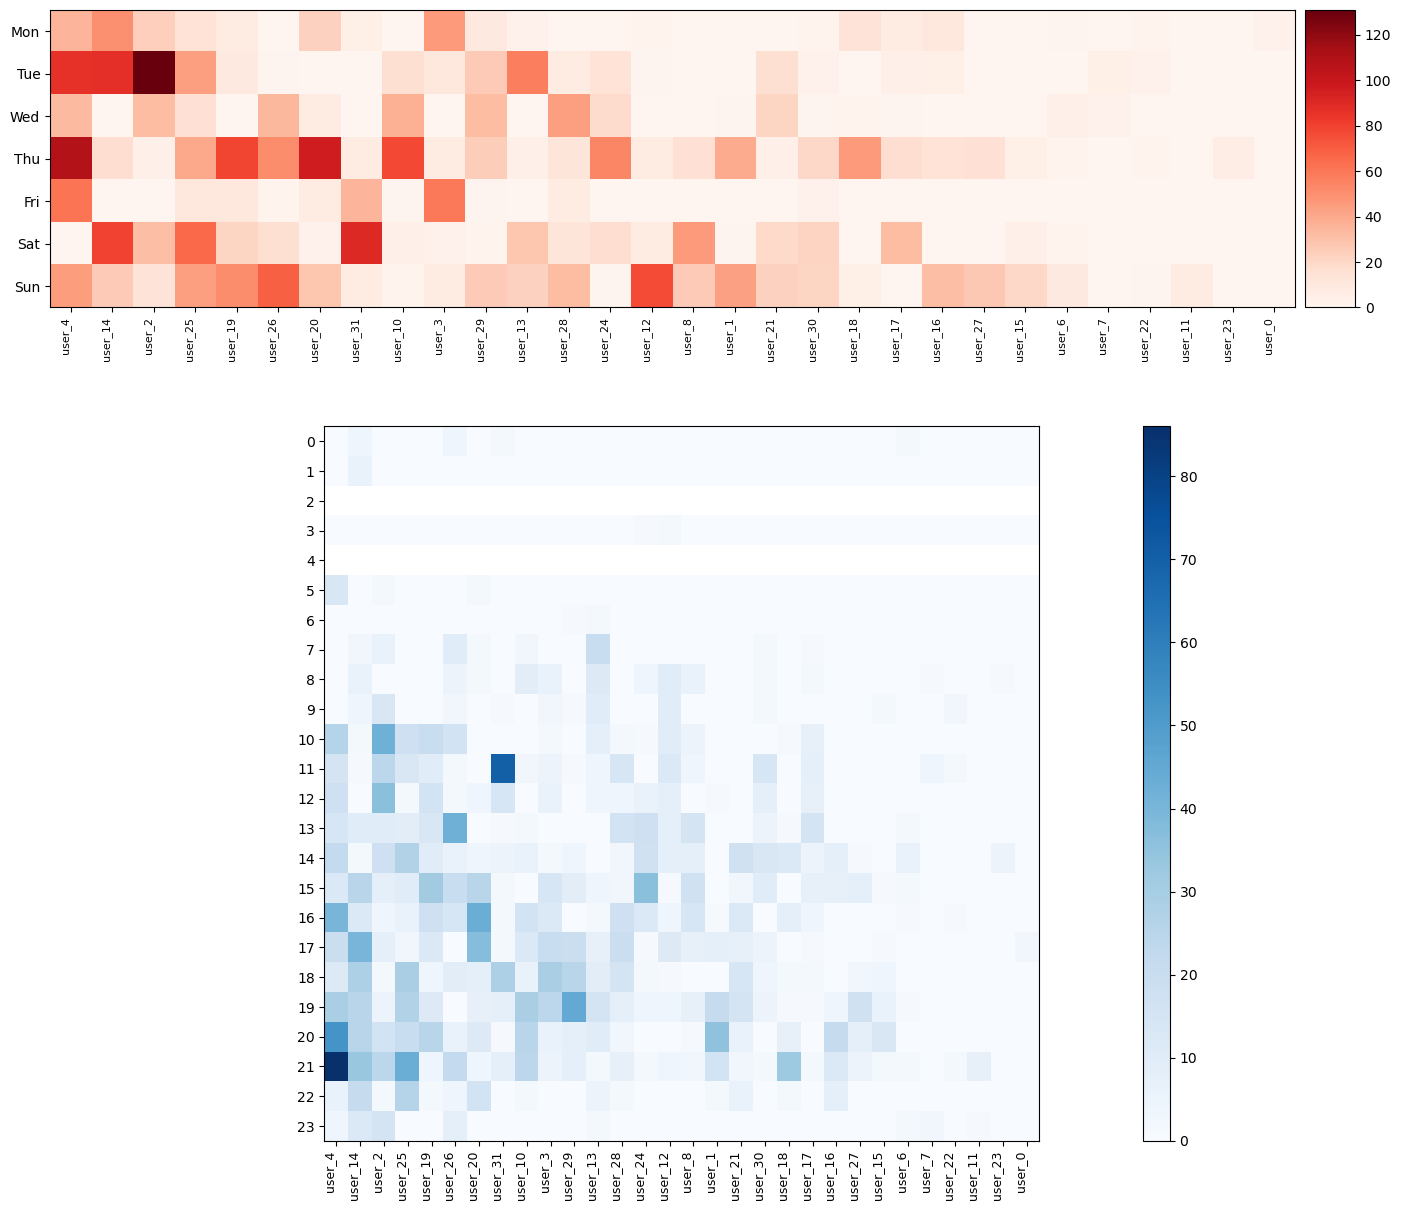

In [14]:
fig = plt.figure(figsize=(15, 13))  


ax1 = plt.subplot(3, 1, (1, 1))
data1 = heatmap_weekday.T

im1 = ax1.imshow(data1, cmap='Reds', aspect='auto')


ax1.set_xticks(range(len(data1.columns)))
ax1.set_xticklabels(data1.columns, rotation=90, ha='right', fontsize=8)

ax1.set_yticks(range(len(data1.index)))
ax1.set_yticklabels(data1.index, fontsize=10)

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="4%", pad=0.1)
cbar1 = plt.colorbar(im1, cax=cax1)


ax2 = plt.subplot(3, 1, (2, 3))  
data2 = heatmap_hour.T


n_users = len(data2.columns)
n_hours = len(data2.index)  

aspect_ratio = n_users / n_hours  

im2 = ax2.imshow(data2, cmap='Blues', aspect=aspect_ratio)


ax2.set_yticks(range(len(data2.index)))
ax2.set_yticklabels([int(i) for i in data2.index], fontsize=10)


ax2.set_xticks(range(len(data2.columns)))
ax2.set_xticklabels(data2.columns, rotation=90, ha='right', fontsize=9)


divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="3%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2)


plt.subplots_adjust(hspace=0.4, top=0.95, bottom=0.08, left=0.08, right=0.95)

plt.show()

Закрываем соединение с базой данных

In [15]:
connection.close()

У какого пользователя больше всего коммитов во вторник? 

Ответ: `user_2`

У какого пользователя больше всего коммитов в четверг? 

Ответ: `user_4`

В какой день недели пользователи не любят делать много коммитов?

Ответ: `Friday`.

Какой пользователь сделал наибольшее количество коммитов и в какое время? 

Ответ: `user_4, 21`